means -1620904.1080744155 9265015.638157874


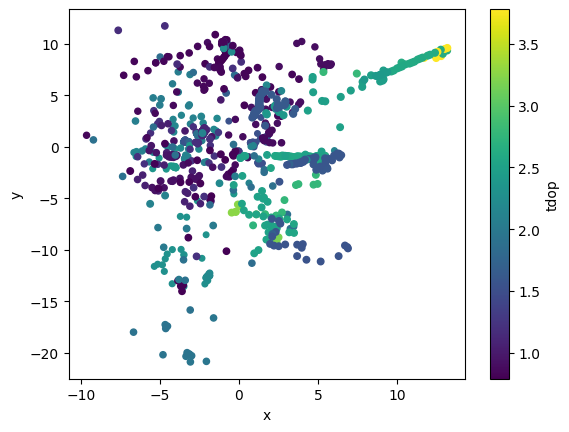

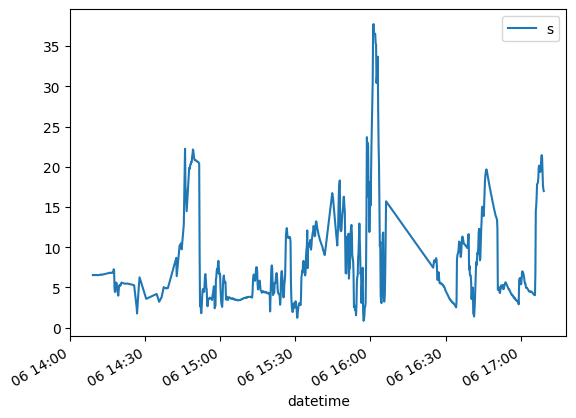

In [22]:
import json
import datetime
import pandas as pd
import pyproj

with open("data/location06062023_a.json") as data_file:
    rows = {'datetime':[], 'numSat':[], 'lat':[], 'lon':[], 'alt':[], 'x':[], 'y':[], 'pdop':[], 'hdop':[], 'vdop':[], 'tdop':[]}
    trans = pyproj.Transformer.from_crs('WGS84', 'EPSG:3035')
    line : str
    for line in data_file:
        js = line.strip()
        if js:
            entry = json.loads(js)
            # print(entry)
            (hours, minutes, seconds) = entry['time'].split(':')
            (seconds, microseconds) = seconds.split('.')
            # Here both list comprehension [ op for x in list ] and unpack *[list] are used.
            # Expands to (year, month, day, hour, minute, second, microsecond, timezone)
            dt = datetime.datetime(*[int(i) for i in entry['date'].split('/')], *[int(i) for i in (hours, minutes, seconds, microseconds)], datetime.UTC)
            if dt.year != 1980 and entry['numSat'] > 15 and entry['tdop'] < 4.0:
                rows['datetime'].append(dt)
                rows['numSat'].append(entry['numSat'])
                rows['lat'].append(entry['lat'])
                rows['lon'].append(entry['lon'])
                rows['alt'].append(entry['alt'])
                rows['pdop'].append(entry['pdop'])
                rows['hdop'].append(entry['hdop'])
                rows['vdop'].append(entry['vdop'])
                rows['tdop'].append(entry['tdop'])
                x, y = trans.transform(float(entry['lon']), float(entry['lat']))
                rows['x'].append(x)
                rows['y'].append(y) 
                

    df = pd.DataFrame(rows)
    x_mean = df['x'].mean()
    y_mean = df['y'].mean()
    alt_mean = df['alt'].mean()
    df['x'] = df['x'] - x_mean
    df['y'] = df['y'] - y_mean 
    df['z'] = alt_mean - df['alt'] 
    df['s'] = (df['x']**2 + df['y']**2 + df['z']**2)**0.5
    print("means", x, y)
    df.plot.scatter(x='x', y='y', c='tdop', s='numSat')
 
    df.plot.line(x='datetime', y=['s'])


<Axes: xlabel='datetime'>

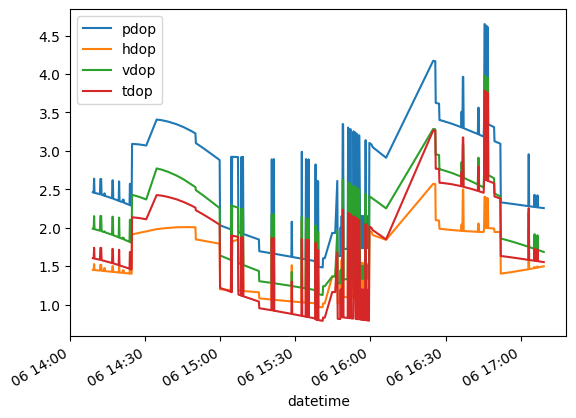

In [23]:
df.plot.line(x='datetime', y=['pdop','hdop', 'vdop', 'tdop'])

<Axes: xlabel='datetime'>

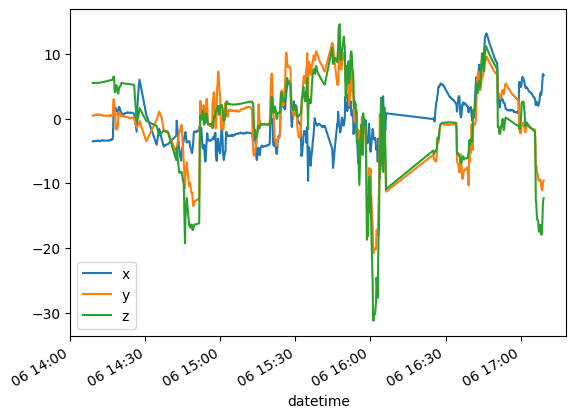

In [24]:
df.plot.line(x='datetime', y=['x','y', 'z'])